In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


# Importing and Loading Data

We'll load and inspect the dataset to get a better understanding of the data we'll be working with

In [2]:
df = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv')
test_data = pd.read_csv('/kaggle/input/ue21cs342aa2/test.csv')

Converting the 'Date' column to a datetime format.


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

### Let's take a closer look at the loaded data to understand its structure.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        300 non-null    int64         
 1   Date      300 non-null    datetime64[ns]
 2   Open      300 non-null    float64       
 3   Close     300 non-null    float64       
 4   Volume    300 non-null    int64         
 5   Strategy  300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 14.2+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      100 non-null    int64         
 1   Date    100 non-null    datetime64[ns]
 2   Open    100 non-null    float64       
 3   Volume  100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


In [6]:
df.head(10)

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy
5,5,2015-07-06,51.374399,58.494017,590857400,Buy
6,6,2015-07-13,45.851376,60.269347,693570200,Buy
7,7,2015-07-20,45.200332,52.738477,326224700,Buy
8,8,2015-07-27,49.402806,56.363684,288132300,Buy
9,9,2015-08-03,47.101190,55.975242,294538600,Buy


# Data Visualization

### Let's visualize the stock's 'Open' prices  and Volume over time.

Reason for Visualizing 'Open' Prices Over Time

- **Trend Analysis**: Visualizing the 'Open' prices over time allows us to observe the overall trend in the stock's value. We can identify patterns such as upward or downward trends, periods of volatility, and potential turning points.

- **Historical Performance**: It provides a historical perspective of how the stock has performed. Investors and analysts often examine past price movements to make informed decisions about future investments.

- **Volatility Assessment**: Fluctuations in the 'Open' prices can be assessed, helping us understand the stock's volatility. This information can be valuable for risk assessment and investment strategies.

- **Decision Support**: Analyzing the 'Open' prices can be a crucial part of making buy or sell decisions. It can help in determining entry and exit points for trading or investment.

- **Data Understanding**: Visualizing the data is an essential step in data exploration. It gives us an initial understanding of the dataset, including the distribution of the 'Open' prices.

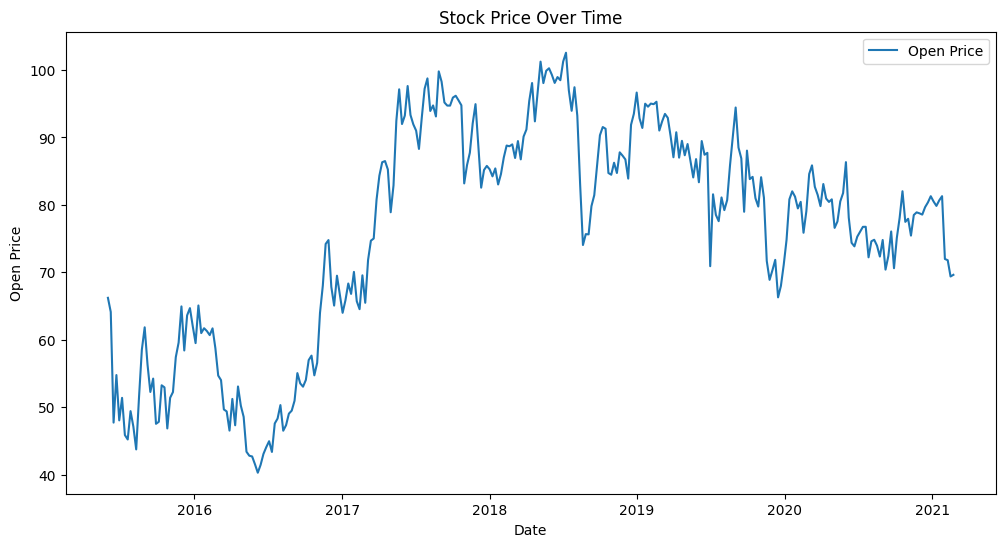

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.title('Stock Price Over Time')
plt.show()

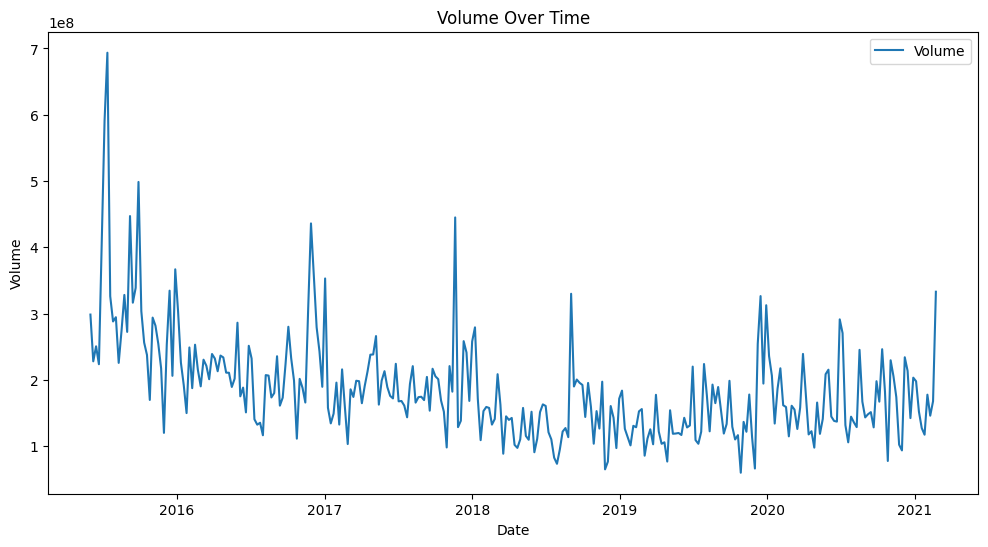

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.title('Volume Over Time')
plt.show()

Now we'll calculate and visualize the Simple Moving Average (SMA) of the 'Open' prices. But why are we doing this?

Reason for Using Simple Moving Average (SMA):

- **Trend Analysis**: Simple Moving Averages are commonly used to identify trends in time series data. By calculating the SMA over a specific window (e.g., 10 weeks), we can smooth out short-term fluctuations in the 'Open' prices and focus on longer-term trends.

- **Support and Resistance Levels**: SMA can help in identifying potential support (price floor) and resistance (price ceiling) levels. When the 'Open' price crosses above the SMA, it may indicate a bullish trend, and when it crosses below, it may suggest a bearish trend.

- **Decision Support**: SMA can be used in trading strategies. For instance, if we see the 'Open' price crossing above the SMA, it might be a signal to consider buying the stock, and if it crosses below, it might signal selling.

- **Historical Price Patterns**: By visualizing the SMA alongside the actual 'Open' prices, we can observe how the stock's price behavior relates to its historical moving average. This can provide valuable insights into potential price movements.

This analysis will help us better understand the stock's price trends and potentially make more informed investment decisions.

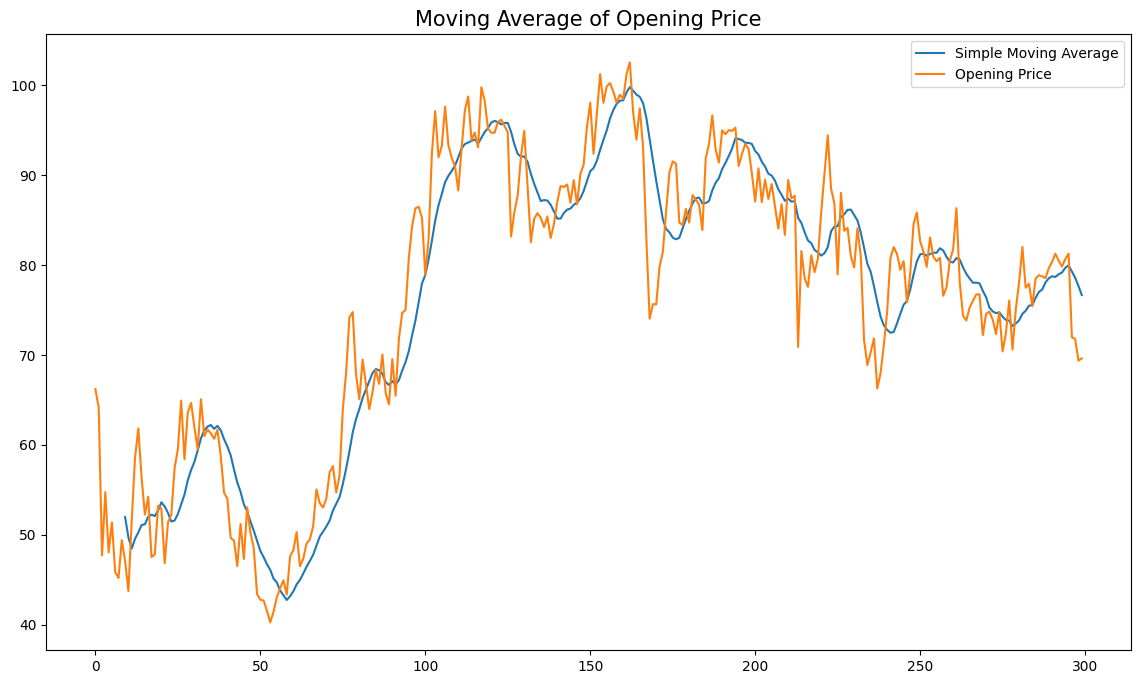

In [9]:
simple_ma = df["Open"].rolling(window=10).mean()

plt.figure(figsize=(14,8))
simple_ma.plot(label="Simple Moving Average")
df["Open"].plot(label="Opening Price")
plt.xticks(rotation=0)
plt.title("Moving Average of Opening Price", size=15)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


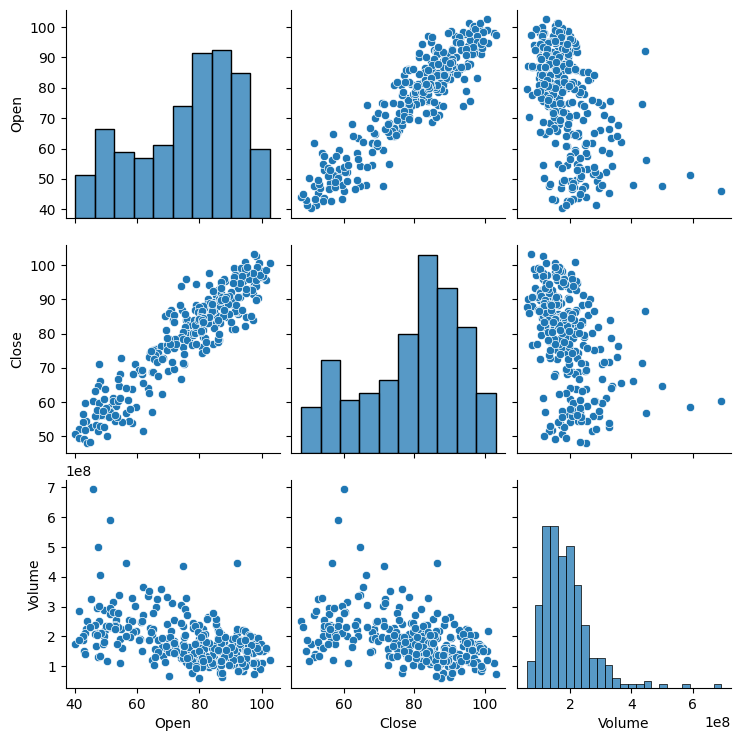

In [10]:
import seaborn as sns

# Create a pair plot for Open, Close, and Volume
sns.pairplot(df[['Open', 'Close', 'Volume']])
plt.show()

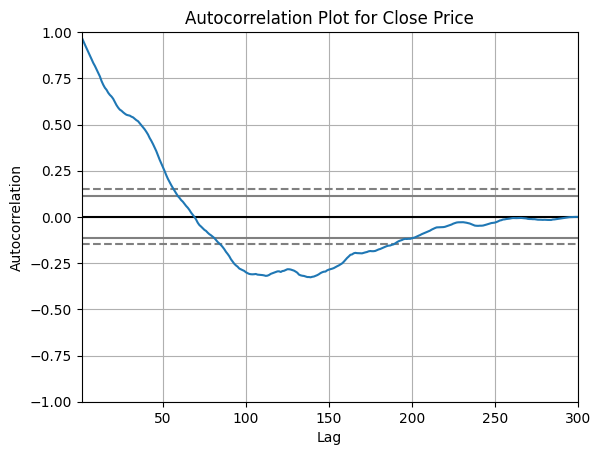

In [11]:
from pandas.plotting import autocorrelation_plot

# Create an autocorrelation plot
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot for Close Price')
plt.show()

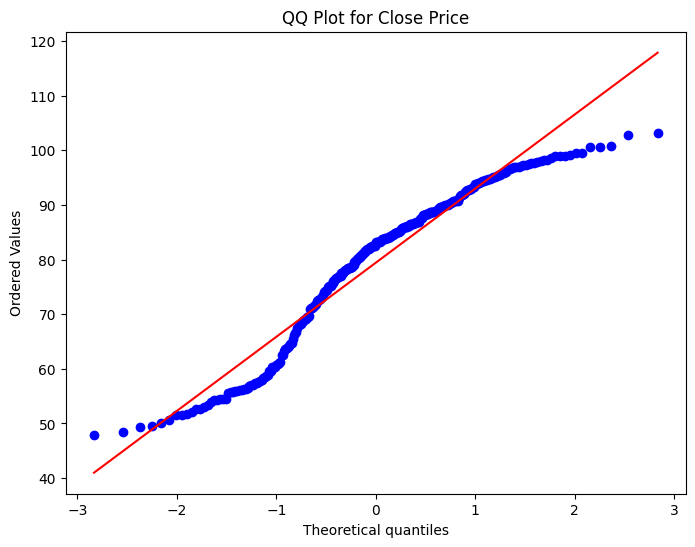

In [12]:
from scipy import stats

close_prices = df['Close']

plt.figure(figsize=(8, 6))
stats.probplot(close_prices, plot=plt, dist='norm')
plt.title('QQ Plot for Close Price')
plt.show()

# Feature Engineering

In [13]:
df.set_index("Date", inplace=True)
df = df.drop('id', axis=1)

Performing feature engineering to create new columns based on the existing data. Let's explore each of the new columns and their purposes.

1. **Open_Lag1, Open_Lag2, Open_Lag3, Open_Lag4, Volume_Lag1, Volume_Lag2, Volume_Lag3, Volume_Lag4**:
   - **Purpose**: These columns represent lagged values of 'Open' and 'Volume' at different time intervals (lags).
   - **Reason**: Lagged values are useful for time series analysis to capture past behavior and trends. They can provide insights into how current values relate to historical values.


2. **Open_RollingMean, Open_RollingStd, Open_RollingMin, Open_RollingMax, Volume_RollingMean, Volume_RollingStd, Volume_RollingMin, Volume_RollingMax**:
   - **Purpose**: These columns store rolling statistics (mean, standard deviation, minimum, and maximum) for 'Open' and 'Volume.'
   - **Reason**: Rolling statistics help in smoothing out noise and identifying trends and volatility patterns in the time series data. They provide a more stable view of the data.


3. **Open_diff**:
   - **Purpose**: This column represents the difference between consecutive 'Open' prices.
   - **Reason**: Calculating price differences can highlight the rate of change in 'Open' prices. It can be valuable for identifying price movements.


4. **EWMA_Open (Exponentially Weighted Moving Average of Open_diff)**:
   - **Purpose**: This column contains the Exponentially Weighted Moving Average (EWMA) of the 'Open_diff' values.
   - **Reason**: The EWMA is used to give more weight to recent data points, making it sensitive to recent price changes. It can be useful for identifying short-term trends and volatility.


5. **Log_Volume**:
   - **Purpose**: This column stores the natural logarithm of 'Volume.'
   - **Reason**: Taking the logarithm of 'Volume' can help in compressing the scale and making the data more interpretable, especially if 'Volume' has a wide range of values.


6. **Open_Volume_Interaction**:
   - **Purpose**: This column represents the interaction term between 'Open' and 'Log_Volume.'
   - **Reason**: Interactions between features can capture complex relationships in the data. In this case, it can help us explore how the opening price and volume are related.


In [14]:
num_lags = 4

for lag in range(1, num_lags + 1):
    df[f'Open_Lag{lag}'] = df['Open'].shift(lag)
    df[f'Volume_Lag{lag}'] = df['Volume'].shift(lag)
    
window_size = 4  # Adjust the window size as needed

# Calculate rolling mean, rolling std, rolling min, and rolling max for 'Open'
df['Open_RollingMean'] = df['Open'].rolling(window=window_size).mean()
df['Open_RollingStd'] = df['Open'].rolling(window=window_size).std()
df['Open_RollingMin'] = df['Open'].rolling(window=window_size).min()
df['Open_RollingMax'] = df['Open'].rolling(window=window_size).max()

# Calculate rolling mean, rolling std, rolling min, and rolling max for 'Volume'
df['Volume_RollingMean'] = df['Volume'].rolling(window=window_size).mean()
df['Volume_RollingStd'] = df['Volume'].rolling(window=window_size).std()
df['Volume_RollingMin'] = df['Volume'].rolling(window=window_size).min()
df['Volume_RollingMax'] = df['Volume'].rolling(window=window_size).max()

new_columns = [f'Open_Lag{lag}' for lag in range(1, num_lags + 1)] + \
              [f'Volume_Lag{lag}' for lag in range(1, num_lags + 1)] + \
              ['Open_RollingMean', 'Open_RollingStd', 'Open_RollingMin', 'Open_RollingMax',
               'Volume_RollingMean', 'Volume_RollingStd', 'Volume_RollingMin', 'Volume_RollingMax']

# Fill missing values in the new columns only with the mean of each column
df[new_columns] = df[new_columns].fillna(df[new_columns].mean())

df['Open_diff'] = df['Open'] - df['Open'].shift(1)

df['EWMA_Open'] = df['Open_diff'].ewm(span=4).mean()


mean_ewma_open = df['EWMA_Open'].mean()
df['EWMA_Open'].fillna(value=mean_ewma_open, inplace=True)

df['Log_Volume'] = np.log(df['Volume'])
df['Open_Volume_Interaction'] = df['Open'] * df['Log_Volume']

In [15]:
df.head(10)

,Open,Close,Volume,Strategy,Open_Lag1,Volume_Lag1,Open_Lag2,Volume_Lag2,Open_Lag3,Volume_Lag3,...,Open_RollingMin,Open_RollingMax,Volume_RollingMean,Volume_RollingStd,Volume_RollingMin,Volume_RollingMax,Open_diff,EWMA_Open,Log_Volume,Open_Volume_Interaction
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-01,66.208486,75.609978,298506300,Hold,75.999081,1.861406e+08,76.021319,1.862022e+08,76.035584,1.863376e+08,...,72.866544,79.205130,1.859204e+08,4.604805e+07,1.384004e+08,2.404703e+08,NaN,-0.003621,19.514302,1292.012362
2015-06-08,64.116235,74.443331,227974800,Hold,66.208486,2.985063e+08,76.021319,1.862022e+08,76.035584,1.863376e+08,...,72.866544,79.205130,1.859204e+08,4.604805e+07,1.384004e+08,2.404703e+08,-2.092251,-2.092251,19.244746,1233.900639
2015-06-15,47.701942,71.140831,250670900,Buy,64.116235,2.279748e+08,66.208486,2.985063e+08,76.035584,1.863376e+08,...,72.866544,79.205130,1.859204e+08,4.604805e+07,1.384004e+08,2.404703e+08,-16.414294,-11.043527,19.339651,922.538928
2015-06-22,54.754816,72.881344,223614300,Hold,47.701942,2.506709e+08,64.116235,2.279748e+08,66.208486,2.985063e+08,...,47.701942,66.208486,2.501916e+08,3.432433e+07,2.236143e+08,2.985063e+08,7.052875,-1.810669,19.225433,1052.685065
2015-06-29,48.031899,66.284718,406814900,Buy,54.754816,2.236143e+08,47.701942,2.506709e+08,64.116235,2.279748e+08,...,47.701942,64.116235,2.772687e+08,8.717481e+07,2.236143e+08,4.068149e+08,-6.722917,-4.068136,19.823869,952.178076
2015-07-06,51.374399,58.494017,590857400,Buy,48.031899,4.068149e+08,54.754816,2.236143e+08,47.701942,2.506709e+08,...,47.701942,54.754816,3.679894e+08,1.691009e+08,2.236143e+08,5.908574e+08,3.342499,-0.853946,20.197085,1037.613113
2015-07-13,45.851376,60.269347,693570200,Buy,51.374399,5.908574e+08,48.031899,4.068149e+08,54.754816,2.236143e+08,...,45.851376,54.754816,4.787142e+08,2.073521e+08,2.236143e+08,6.935702e+08,-5.523023,-2.812978,20.357363,933.413100
2015-07-20,45.200332,52.738477,326224700,Buy,45.851376,6.935702e+08,51.374399,5.908574e+08,48.031899,4.068149e+08,...,45.200332,51.374399,5.043668e+08,1.678586e+08,3.262247e+08,6.935702e+08,-0.651044,-1.923299,19.603097,886.066485
2015-07-27,49.402806,56.363684,288132300,Buy,45.200332,3.262247e+08,45.851376,6.935702e+08,51.374399,5.908574e+08,...,45.200332,51.374399,4.746962e+08,1.985356e+08,2.881323e+08,6.935702e+08,4.202475,0.568869,19.478930,962.313822


**In order to build an effective predictive model, it's essential to select the most relevant features. One way to do this is by assessing the correlation between the newly engineered columns and the target variable or each other. Correlation analysis helps identify which features are most informative for predicting the target variable.**

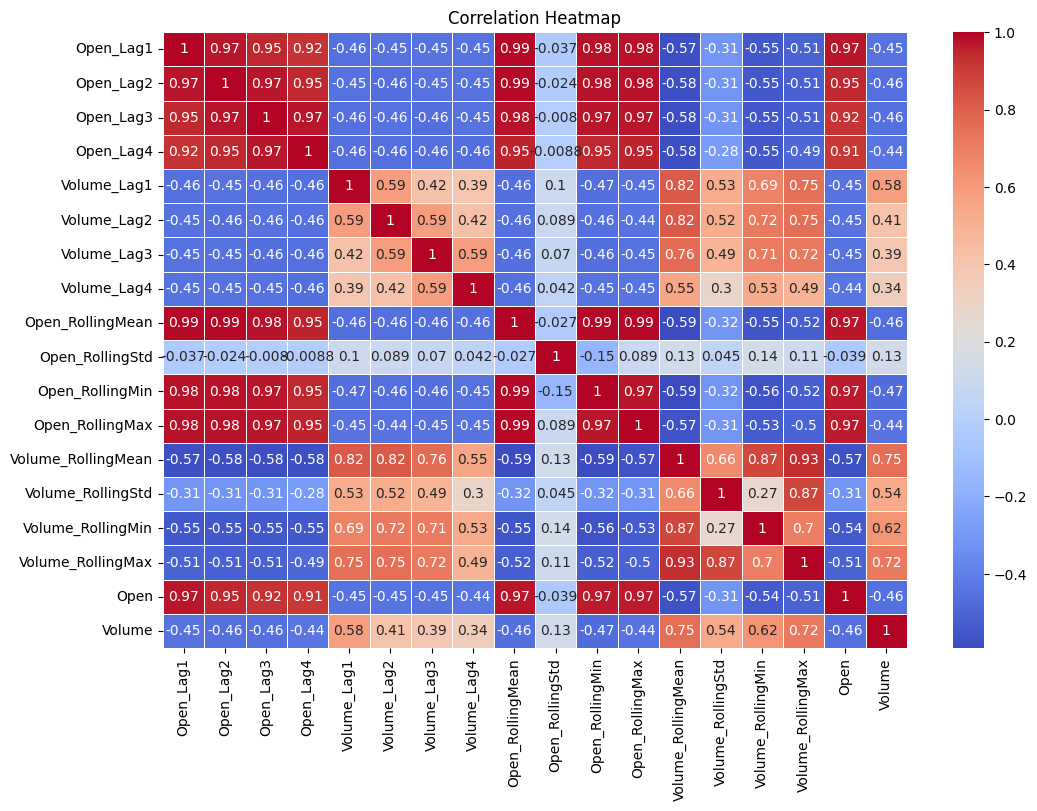

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
selected_columns = new_columns + ['Open', 'Volume']

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**To make predictions using the features we've engineered, we need to ensure that the test data goes through the same feature engineering process as the training data. This ensures consistency in data preparation and model input.**

In [17]:
num_lags = 4

for lag in range(1, num_lags + 1):
    test_data[f'Open_Lag{lag}'] = test_data['Open'].shift(lag)
    test_data[f'Volume_Lag{lag}'] = test_data['Volume'].shift(lag)
    
window_size = 4  # Adjust the window size as needed

# Calculate rolling mean, rolling std, rolling min, and rolling max for 'Open' in test_data
test_data['Open_RollingMean'] = test_data['Open'].rolling(window=window_size).mean()
test_data['Open_RollingStd'] = test_data['Open'].rolling(window=window_size).std()
test_data['Open_RollingMin'] = test_data['Open'].rolling(window=window_size).min()
test_data['Open_RollingMax'] = test_data['Open'].rolling(window=window_size).max()

# Calculate rolling mean, rolling std, rolling min, and rolling max for 'Volume' in test_data
test_data['Volume_RollingMean'] = test_data['Volume'].rolling(window=window_size).mean()
test_data['Volume_RollingStd'] = test_data['Volume'].rolling(window=window_size).std()
test_data['Volume_RollingMin'] = test_data['Volume'].rolling(window=window_size).min()
test_data['Volume_RollingMax'] = test_data['Volume'].rolling(window=window_size).max()

# Fill missing values in the new columns only with the mean of each column
new_columns = [f'Open_Lag{lag}' for lag in range(1, num_lags + 1)] + \
              [f'Volume_Lag{lag}' for lag in range(1, num_lags + 1)] + \
              ['Open_RollingMean', 'Open_RollingStd', 'Open_RollingMin', 'Open_RollingMax',
               'Volume_RollingMean', 'Volume_RollingStd', 'Volume_RollingMin', 'Volume_RollingMax']

test_data[new_columns] = test_data[new_columns].fillna(test_data[new_columns].mean())

test_data['Open_diff'] = test_data['Open'] - test_data['Open'].shift(1)

test_data['EWMA_Open'] = test_data['Open_diff'].ewm(span=4).mean()

mean_ewma_open = test_data['EWMA_Open'].mean()
test_data['EWMA_Open'].fillna(value=mean_ewma_open, inplace=True)

test_data['Log_Volume'] = np.log(test_data['Volume'])
test_data['Open_Volume_Interaction'] = test_data['Open'] * test_data['Log_Volume']

In [18]:
test_data.shape

(100, 24)

# Augmented Dickey-Fuller Test

**Using the Augmented Dickey-Fuller (ADF) test d to assess whether the given time series data has a unit root, which implies it is non-stationary. A stationary time series is one whose statistical properties, such as mean and variance, do not change over time.**


### Purpose of the ADF Test

The ADF test is typically applied for the following purposes:

- **Stationarity Check**: It helps in determining whether a time series is stationary or non-stationary. Stationary time series data is often easier to model and analyze.

- **Trend Analysis**: The test can reveal information about the presence of trends in the data. If a time series is found to be non-stationary, it may suggest the presence of a trend.

Let's apply the Augmented Dickey-Fuller (ADF) test to assess the stationarity of the 'Open' and 'Volume' columns. Stationarity is a fundamental property in time series analysis, and the ADF test helps determine if these columns exhibit stationarity.

In [19]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series, variable_name):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Test for {variable_name}:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')

    for key, value in result[4].items():
        print(f'{key}: {value}')

    if result[1] <= 0.05:
        print(f"The {variable_name} time series is stationary (reject null hypothesis).")
    else:
        print(f"The {variable_name} time series is non-stationary (fail to reject null hypothesis).")

adf_test(df['Open'], 'Open')
print("\n")
adf_test(df['Close'], 'Close')
print("\n")
adf_test(df['Volume'], 'Volume')

ADF Test for Open:
ADF Statistic: -1.904219816681667
p-value: 0.33007858725055095
Critical Values:
1%: -3.4524859843440754
5%: -2.871288184343229
10%: -2.571964047565425
The Open time series is non-stationary (fail to reject null hypothesis).


ADF Test for Close:
ADF Statistic: -1.8080055426222836
p-value: 0.37649446979222034
Critical Values:
1%: -3.4524859843440754
5%: -2.871288184343229
10%: -2.571964047565425
The Close time series is non-stationary (fail to reject null hypothesis).


ADF Test for Volume:
ADF Statistic: -3.327071678181228
p-value: 0.013710894607624674
Critical Values:
1%: -3.4531816058796143
5%: -2.871593390724642
10%: -2.5721268156511536
The Volume time series is stationary (reject null hypothesis).


We have to make the 'Open' and 'Close' prices stationary, performing differencing one or more times until the ADF test indicates stationarity (i.e., the p-value is less than or equal to 0.05)

In [20]:
df['Open_diff'] = df['Open'] - df['Open'].shift(1)
mean_open_diff = df['Open_diff'].mean()
df['Open_diff'].fillna(mean_open_diff, inplace=True)
test_data['Open_diff'].fillna(test_data['Open_diff'].mean(), inplace=True)
adf_test(df['Open_diff'].dropna(), 'Differenced Open')

ADF Test for Differenced Open:
ADF Statistic: -12.319051215386942
p-value: 6.816569593962617e-23
Critical Values:
1%: -3.4525611751768914
5%: -2.87132117782556
10%: -2.5719816428028888
The Differenced Open time series is stationary (reject null hypothesis).


In [21]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
mean_open_diff = df['Close_diff'].mean()
df['Close_diff'].fillna(mean_open_diff, inplace=True)
adf_test(df['Close_diff'].dropna(), 'Differenced Close')

ADF Test for Differenced Close:
ADF Statistic: -19.64462774095667
p-value: 0.0
Critical Values:
1%: -3.4524113009049935
5%: -2.8712554127251764
10%: -2.571946570731871
The Differenced Close time series is stationary (reject null hypothesis).


**After differencing one the Open Column is now Stationary and we can move forward**

# Decomposition of elements

Decomposing time series into its components, including trend, seasonality, and residual (error) \
We applied seasonal decomposition to the 'Open' column using the multiplicative model. The decomposition reveals the trend, seasonality, and residual components.

/tmp/ipykernel_32/2598458128.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


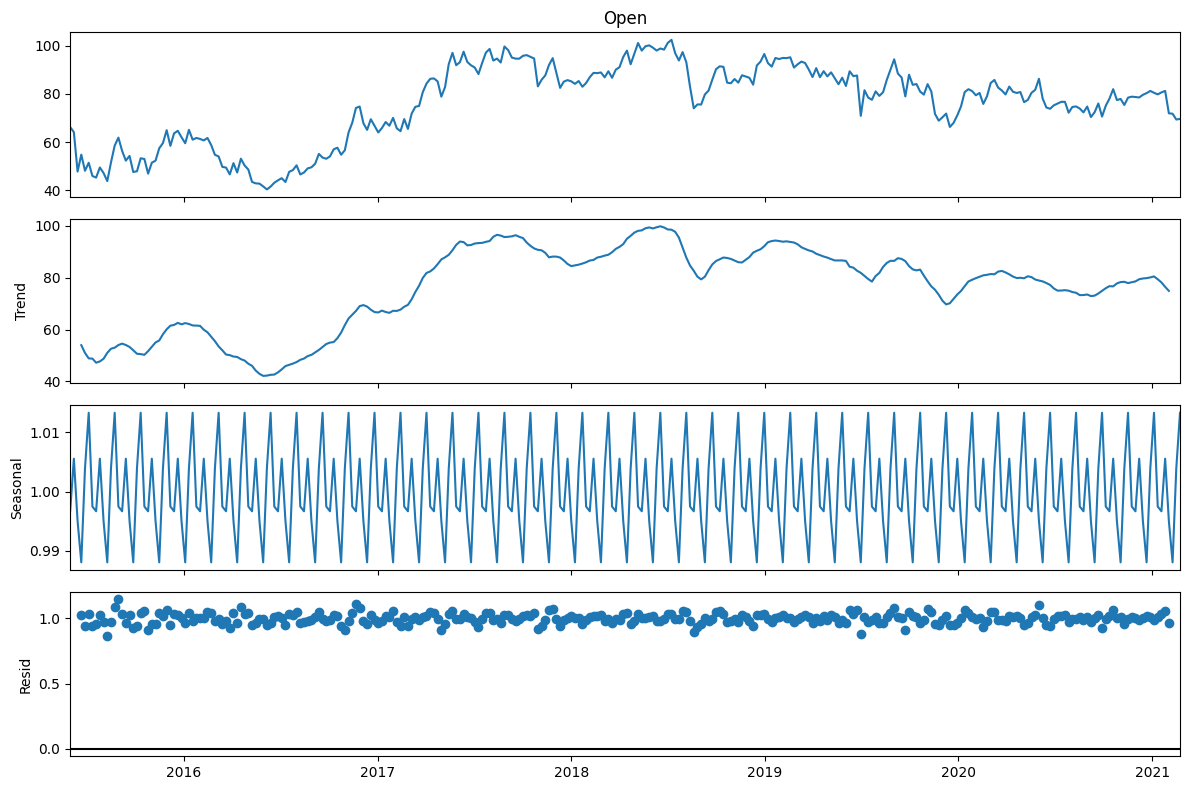

In [22]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df["Open"], model="multiplicative", period=7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

**The effect of differencing on the 'Open' column and to visualize the resulting time series**

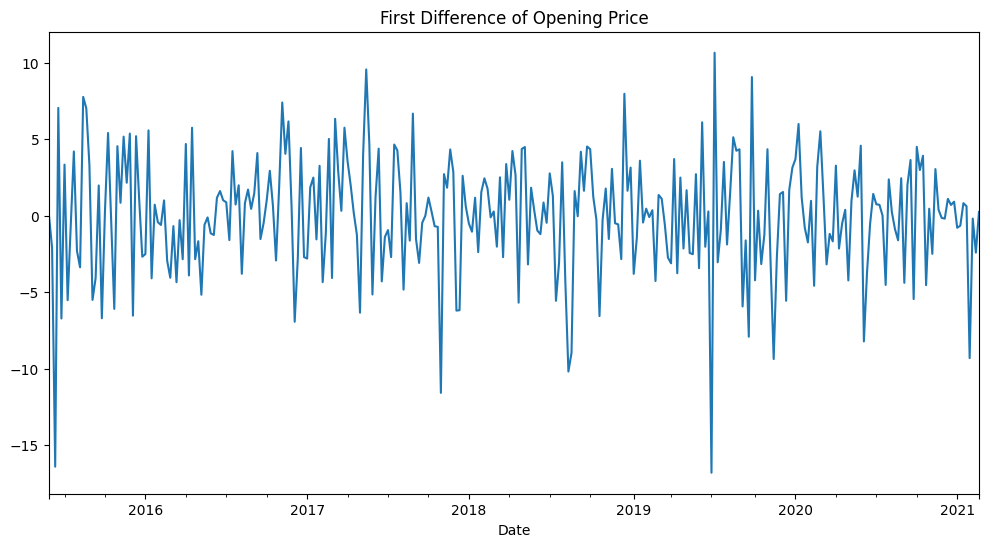

In [23]:
differenced_df = df['Open_diff']
plt.figure(figsize=(12, 6))
differenced_df.plot()
plt.title("First Difference of Opening Price")
plt.show()

# SARIMAX Model

In our time series analysis, we are using the SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) model. The choice of the SARIMAX model is based on several considerations:

### 1. Handling Seasonality

SARIMAX is particularly well-suited for time series data that exhibit seasonality, which is the presence of recurring patterns or cycles at specific intervals. SARIMAX can model and capture these seasonal patterns, making it an appropriate choice when dealing with data that has clear seasonal components.

### 2. Autoregressive and Moving Average Components

SARIMAX combines autoregressive (AR) and moving average (MA) components, allowing us to model the dependencies on past values and past forecast errors, respectively. This is valuable for capturing the temporal relationships within the time series.

### 3. Exogenous Regressors

SARIMAX can incorporate exogenous variables or regressors. In our analysis, we may have additional factors or variables that influence the time series, such as external economic indicators or events. SARIMAX can account for these exogenous factors when modeling the time series, enhancing its flexibility.

### 4. Forecasting Capabilities

SARIMAX is well-suited for time series forecasting. By analyzing historical data and modeling seasonality and dependencies, SARIMAX can provide forecasts of future values, which is essential for making informed decisions in finance and other domains.

### 5. Model Interpretability

SARIMAX models are relatively interpretable. We can assess the significance of model components, including autoregressive and moving average terms, and understand how they contribute to the forecast.

Overall, the SARIMAX model is a versatile and powerful tool for time series analysis, especially when dealing with data that exhibits seasonality and potential exogenous factors that influence the time series.

## Determining the p and q Values

**We have generated ACF and PACF plots for the differenced 'Open' column**

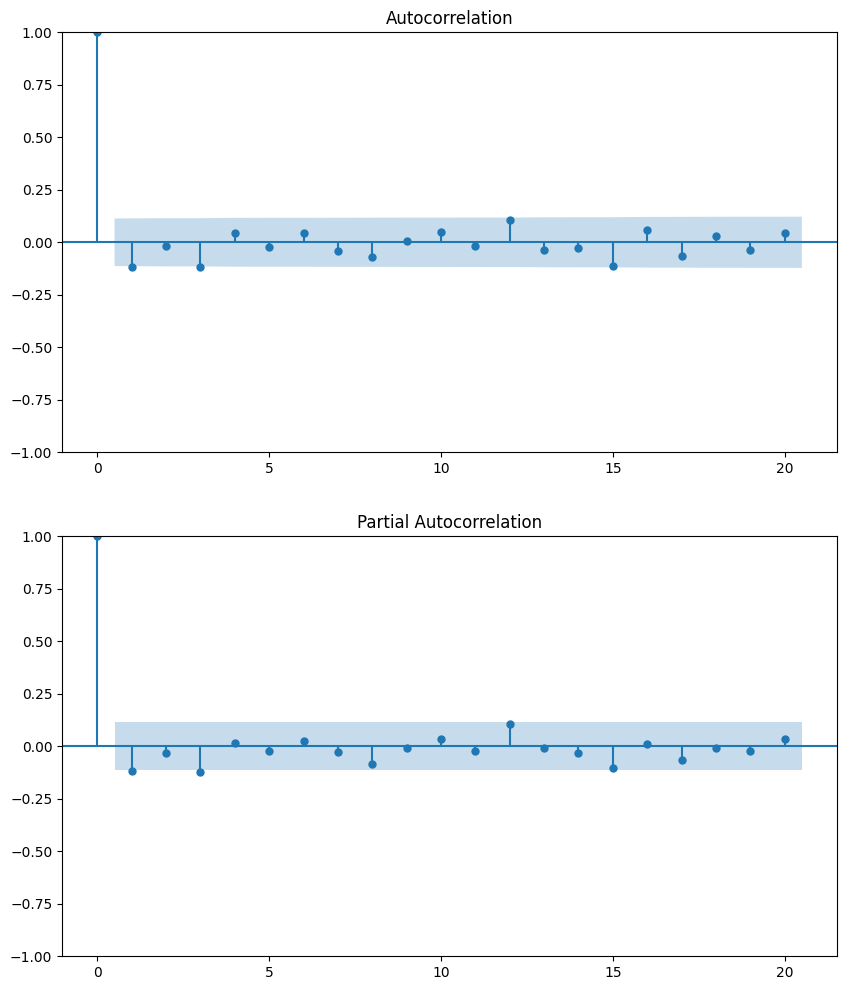

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2 ,1, figsize=(10, 12))
plot_acf(differenced_df.iloc[1:], lags=20, ax=ax[0])
plot_pacf(differenced_df.iloc[1:], lags=20, ax=ax[1])
plt.show()

The ACF and PACF plots serve the following purposes:

- **Pattern Identification**: They help in identifying patterns in the time series data. ACF and PACF can reveal the presence of seasonality, trends, and other structural information.

- **Model Order Selection**: They assist in selecting appropriate orders for time series models, such as autoregressive (AR) and moving average (MA) models.

In [25]:
#Finding the best value for ARIMA
'''import warnings
warnings.filterwarnings("ignore")
import itertools
p=q=range (0,5)
d = range(0,2)
pdq = list(itertools.product (p, d, q))
store = {}
for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA (train_data.Close, order = param)
        model_arima_fit = model_arima.fit()
        store[param] = model_arima_fit.aic

    except:
        continue
sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print(sorted_dict)'''

'import warnings\nwarnings.filterwarnings("ignore")\nimport itertools\np=q=range (0,5)\nd = range(0,2)\npdq = list(itertools.product (p, d, q))\nstore = {}\nfor param in pdq:\n    try:\n        model_arima = sm.tsa.arima.ARIMA (train_data.Close, order = param)\n        model_arima_fit = model_arima.fit()\n        store[param] = model_arima_fit.aic\n\n    except:\n        continue\nsorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))\nprint(sorted_dict)'

In [26]:
df.columns

Index(['Open', 'Close', 'Volume', 'Strategy', 'Open_Lag1', 'Volume_Lag1',
       'Open_Lag2', 'Volume_Lag2', 'Open_Lag3', 'Volume_Lag3', 'Open_Lag4',
       'Volume_Lag4', 'Open_RollingMean', 'Open_RollingStd', 'Open_RollingMin',
       'Open_RollingMax', 'Volume_RollingMean', 'Volume_RollingStd',
       'Volume_RollingMin', 'Volume_RollingMax', 'Open_diff', 'EWMA_Open',
       'Log_Volume', 'Open_Volume_Interaction', 'Close_diff'],
      dtype='object')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

exog_vars = ["Open_diff",'Open_Lag1','Open_Lag2','Open_Lag3','Open_RollingMean', 'Open_RollingStd', 'Open_RollingMin', 'Open_RollingMax','Open_Volume_Interaction','Open']

In our SARIMAX model, we have selected the following exogenous variables:

- **'Open_diff'**: The first-order difference of the 'Open' column, which has been used to achieve stationarity in the time series data.

- **'Open_Lag1', 'Open_Lag2', 'Open_Lag3'**: Lagged values of the 'Open' column, representing the past values at different time intervals. These lags can capture temporal dependencies.

- **'Open_RollingMean', 'Open_RollingStd', 'Open_RollingMin', 'Open_RollingMax'**: Rolling statistics of the 'Open' column, including mean, standard deviation, minimum, and maximum values. These statistics provide insights into the behavior of the time series.

- **'Open_Volume_Interaction'**: An interaction term between the 'Open' column and the logarithm of the 'Volume' column. This interaction may capture the influence of both opening price and trading volume on the time series.

- **'Open'**: The original 'Open' column, included as an exogenous variable to explicitly account for the impact of the opening price on the target variable.

### Rationale for Variable Selection

The choice of these exogenous variables is based on a combination of domain knowledge, data exploration, and statistical analysis. We aim to capture both past dependencies, rolling statistics, and interactions that may impact the closing prices of the stock.

**Applying feature scaling to the exogenous variables using the `StandardScaler`. Feature scaling is crucial for ensuring that the variables are on a common scale, which helps the model's performance and convergence.**

In [28]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(df[exog_vars])

# Transform the training and test data
train_scaled = scaler.transform(df[exog_vars])
test_scaled = scaler.transform(test_data[exog_vars])

In [29]:
train_scaled_df = pd.DataFrame(train_scaled, columns=[col + '_normalized' for col in exog_vars], index=df.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=[col + '_normalized' for col in exog_vars], index=test_data.index)

# Concatenate the original dataframes with the scaled dataframes
train_data = pd.concat([df, train_scaled_df], axis=1)
test_data = pd.concat([test_data, test_scaled_df], axis=1)

exog = sm.add_constant(train_data[[exog_vars[i]+"_normalized" for i in range(len(exog_vars))]])

**Choosing d = 1, because we have applied first-order differencing to the date, to to Achieve Stationarity.** \
**p = 1 and q = 1 from the ACF and PACF plots**


**We observed that there is a repeating pattern in your data every 4 weeks, it makes sense to set S to 4 to capture this seasonality.**

In [30]:
# Specify the SARIMAX model with the modified exogenous variables
mod = SARIMAX(endog=train_data["Close"], exog=exog, order=(1, 1, 1),seasonal_order=(1, 0, 1, 4))

# Fit the model
model_fit = mod.fit(disp=False)

model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  300
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 4)   Log Likelihood                -603.115
Date:                           Sun, 08 Dec 2024   AIC                           1238.230
Time:                                   17:39:42   BIC                           1297.437
Sample:                               06-01-2015   HQIC                          1261.927
                                    - 02-22-2021                                         
Covariance Type:                             opg                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8.008e-06   4.06e+04   1.97e-10      1.000   -7.96e+04    7.96e+04
Open_diff_normalized                  -0.7567      1.092     -0.693      0.489      -2.898       1.384
Open_Lag1_normalized                   0.2993      4.953      0.060      0.952      -9.408      10.006
Open_Lag2_normalized                   4.8631      0.779      6.246      0.000       3.337       6.389
Open_Lag3_normalized                  13.9184      0.773     18.017      0.000      12.404      15.432
Open_RollingMean_normalized          -17.0179      3.704     -4.595      0.000     -24.277      -9.759
Open_RollingStd_normalized            -1.5559      1.008     -1.544      0.123      -3.531       0.420
Open_RollingMin_normalized            -2.1309      4.431     -0.481      0.631     -10.815       6.553
Open_RollingMax_normalized             8.6705      4.227      2.051      0.040       0.386      16.955
Open_Volume_Interaction_normalized    -0.1602      1.150     -0.139      0.889      -2.414       2.093
Open_normalized                        5.5309      4.326      1.278      0.201      -2.949      14.011
ar.L1                                  0.0627      0.066      0.943      0.346      -0.068       0.193
ma.L1                                 -0.9959      0.042    -23.740      0.000      -1.078      -0.914
ar.S.L4                                0.6154      0.444      1.385      0.166      -0.256       1.486
ma.S.L4                               -0.6817      0.418     -1.631      0.103      -1.501       0.138
sigma2                                 3.2492      0.338      9.620      0.000       2.587       3.911
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.92   Prob(JB):                         0.30
Heteroskedasticity (H):               1.10   Skew:                             0.14
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
test_data.head()

,id,Date,Open,Volume,Open_Lag1,Volume_Lag1,Open_Lag2,Volume_Lag2,Open_Lag3,Volume_Lag3,...,Open_diff_normalized,Open_Lag1_normalized,Open_Lag2_normalized,Open_Lag3_normalized,Open_RollingMean_normalized,Open_RollingStd_normalized,Open_RollingMin_normalized,Open_RollingMax_normalized,Open_Volume_Interaction_normalized,Open_normalized
0,0,2021-03-01,72.708331,205897600,70.398916,1.977245e+08,70.551479,1.980842e+08,70.645342,1.982554e+08,...,-0.044035,-0.347250,-0.339264,-0.334366,-0.356595,-0.132970,-0.333973,-0.373671,-0.157637,-0.202678
1,1,2021-03-08,73.310886,214095600,72.708331,2.058976e+08,70.551479,1.980842e+08,70.645342,1.982554e+08,...,0.153138,-0.204050,-0.339264,-0.334366,-0.356595,-0.132970,-0.333973,-0.373671,-0.108849,-0.165325
2,2,2021-03-15,70.610119,151601700,73.310886,2.140956e+08,72.708331,2.058976e+08,70.645342,1.982554e+08,...,-0.702591,-0.166687,-0.205487,-0.334366,-0.356595,-0.132970,-0.333973,-0.373671,-0.366999,-0.332748
3,3,2021-03-22,70.256017,193982500,70.610119,1.516017e+08,73.310886,2.140956e+08,72.708331,2.058976e+08,...,-0.094685,-0.334154,-0.168113,-0.206395,-0.275104,-0.767518,-0.163718,-0.372186,-0.330912,-0.354700
4,4,2021-03-29,68.258324,220238400,70.256017,1.939825e+08,70.610119,1.516017e+08,73.310886,2.140956e+08,...,-0.520459,-0.356111,-0.335627,-0.169018,-0.345371,-0.441059,-0.289002,-0.372186,-0.430737,-0.478538


In [32]:
closeprice_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=sm.add_constant(test_data[[exog_vars[i]+"_normalized" for i in range(len(exog_vars))]]))

**Predicting the Close price values FOR the test dataset**

In [33]:
test_data["Close"]=closeprice_predictions.values
test_data["Close"]

0     75.702159
1     75.672557
2     76.437201
3     76.656456
4     76.994653
        ...    
95    65.124753
96    64.093116
97    61.793556
98    63.821584
99    66.053154
Name: Close, Length: 100, dtype: float64

**Checking the Model fit**

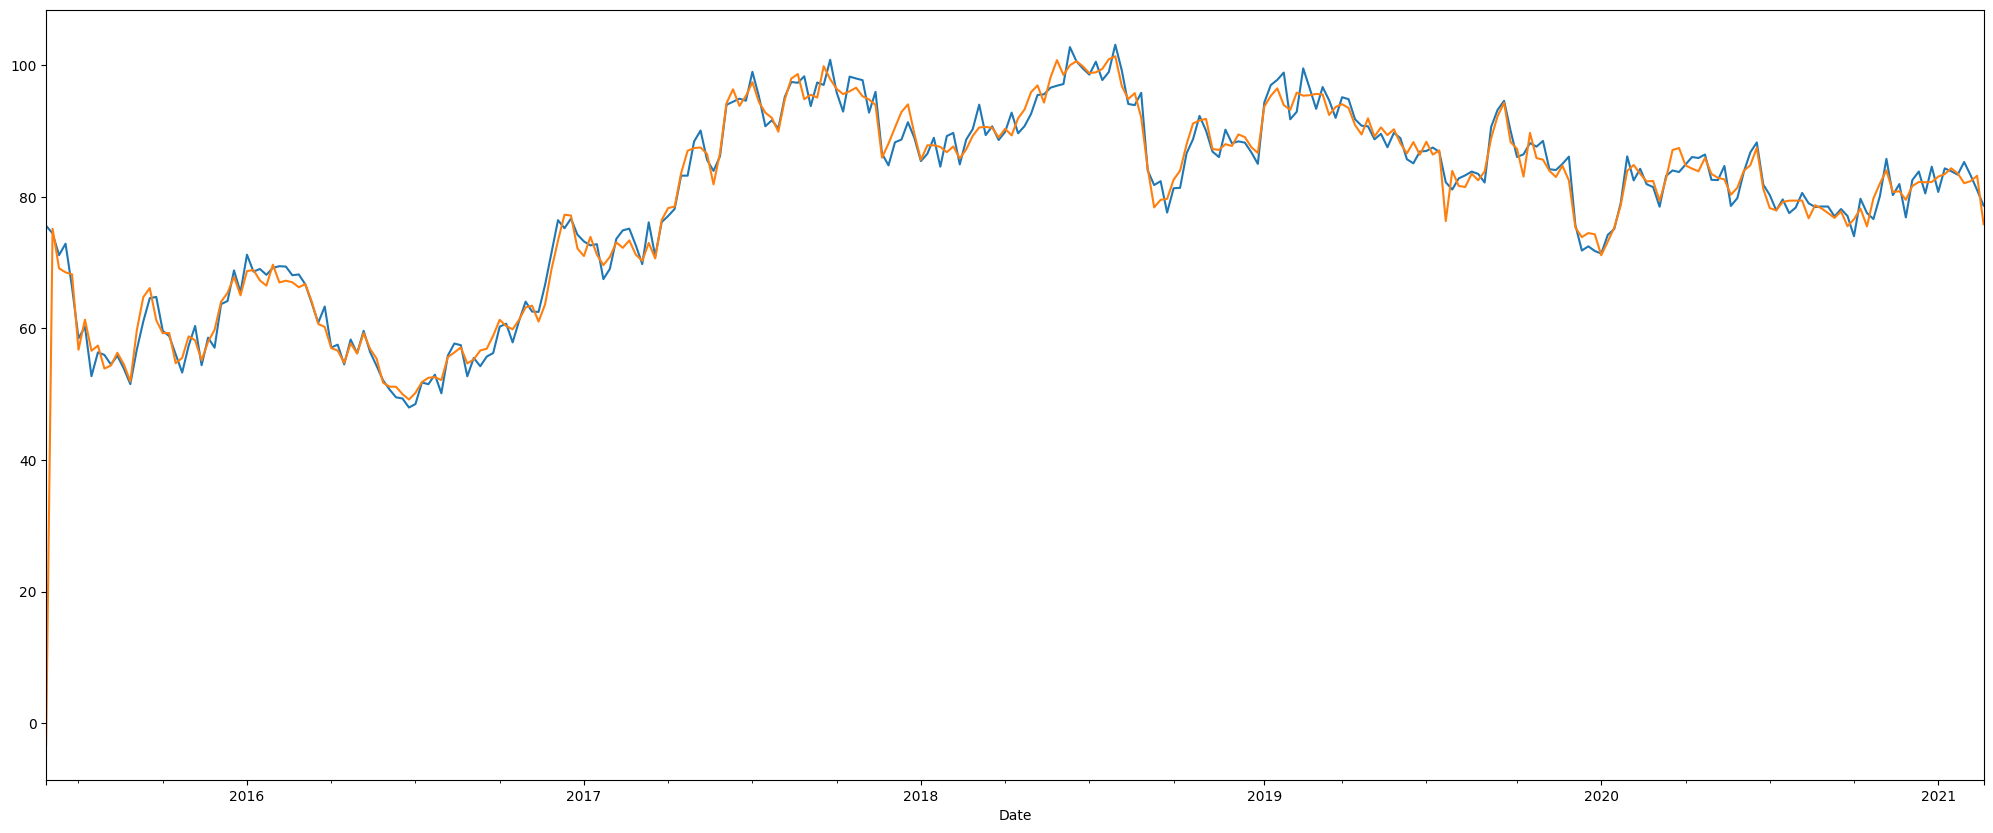

In [34]:
train_data['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

# Classification Model

**We'll visualize the closing values of the stock along with Buy, Hold, and Sell actions. These actions are typically based on a trading or investment strategy and are applied at specific time points.**

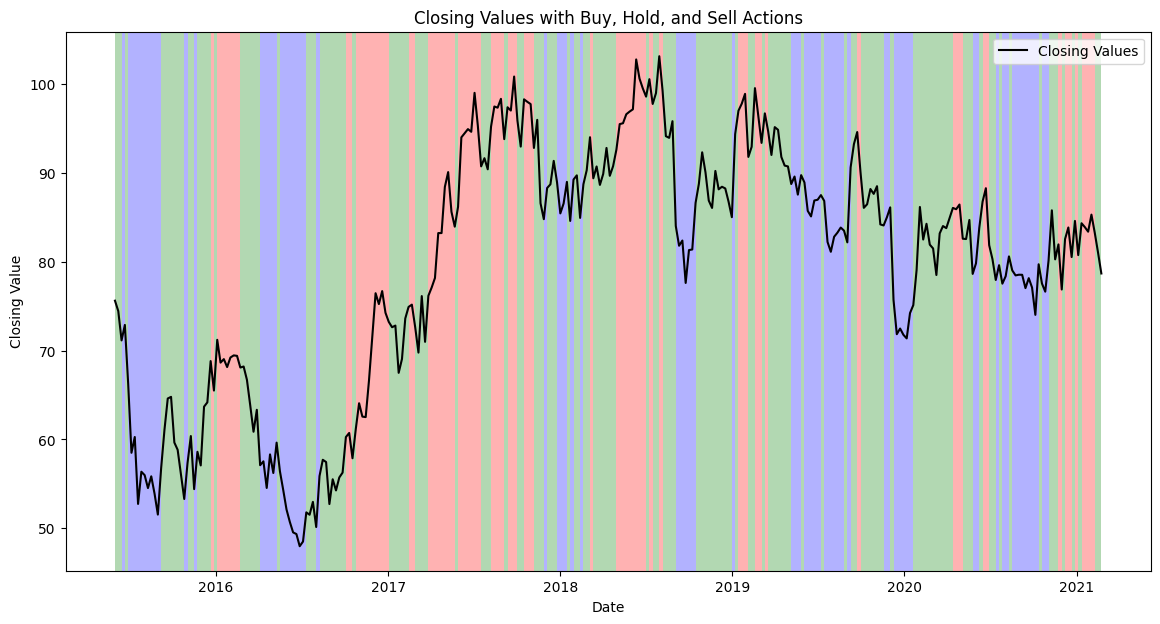

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], color='black', label='Closing Values')

actions= train_data['Strategy']

# Iterate through the actions and set the color for each segment
for i in range(len(df)):
    action = actions[i]
    color = 'blue' if action == 'Buy' else 'green' if action == 'Hold' else 'red'
    try:
        plt.axvspan(df.index[i], df.index[i + 1], facecolor=color, alpha=0.3)
    except:
        pass

plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Closing Values with Buy, Hold, and Sell Actions')

# Show the plot
plt.show()

**Here we see that general startegy is to buy when there's long trend of falling and sell when there's long trends of rising, and for momentary local change in trend it causes a hold startegy in the next week. So we select our features based on this.**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

## Feature Enginnering on Close Price

 **Features Used:**
   - Considering the general strategy of buying during prolonged falling trends and selling during extended rising trends, the features have been selected to capture these long-term trend indicators. The lag features help in capturing momentum shifts, while the rolling statistics provide insight into the trend's duration and magnitude.
   - The features chosen, such as 'Open', 'Volume', 'Open_Lag', 'Volume_Lag', and 'Close', are relevant to stock market prediction as they reflect the historical prices and trading volume. These features capture the time series patterns and dependencies crucial for making predictions.
   - Including lag features and rolling statistics such as 'Close_RollingMean', 'Close_RollingMax', 'Close_RollingMin', 'Close_RollingStd', and 'Close_Lag' enables the model to incorporate recent historical data into its predictions. This allows the model to capture short-term trends and patterns in the data.

In [37]:
scaler = StandardScaler()

features = ['Open', 'Volume', 'Open_Lag1', 'Volume_Lag1', 'Open_Lag2',
       'Volume_Lag2', 'Open_Lag3', 'Volume_Lag3', 'Open_RollingMean',
       'Open_RollingStd', 'Open_RollingMin', 'Open_RollingMax',
       'Volume_RollingMean', 'Volume_RollingStd', 'Volume_RollingMin',
       'Volume_RollingMax', 'Close']

target = 'Strategy'

In [38]:
X= df[features]
Xt= test_data[features]

# Calculate rolling statistics
X['Close_RollingMean'] = X['Close'].rolling(window=3).mean()
X['Close_RollingMax'] = X['Close'].rolling(window=3).max()
X['Close_RollingMin'] = X['Close'].rolling(window=3).min()
X['Close_RollingStd'] = X['Close'].rolling(window=3).std()

# Create lag features
X['Close_Lag1'] = X['Close'].shift(1)
X['Close_Lag2'] = X['Close'].shift(2)
X['Close_Lag3'] = X['Close'].shift(3)

# Calculate rolling statistics
Xt['Close_RollingMean'] = Xt['Close'].rolling(window=3).mean()
Xt['Close_RollingMax'] = Xt['Close'].rolling(window=3).max()
Xt['Close_RollingMin'] = Xt['Close'].rolling(window=3).min()
Xt['Close_RollingStd'] = Xt['Close'].rolling(window=3).std()

# Create lag features
Xt['Close_Lag1'] = Xt['Close'].shift(1)
Xt['Close_Lag2'] = Xt['Close'].shift(2)
Xt['Close_Lag3'] = Xt['Close'].shift(3)

/tmp/ipykernel_32/2553836370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Close_RollingMean'] = X['Close'].rolling(window=3).mean()
/tmp/ipykernel_32/2553836370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Close_RollingMax'] = X['Close'].rolling(window=3).max()
/tmp/ipykernel_32/2553836370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [39]:
new_columns = ['Close_RollingMean', 'Close_RollingMax', 'Close_RollingMin', 'Close_RollingStd', 'Close_Lag1', 'Close_Lag2', 'Close_Lag3']

X[new_columns] = X[new_columns].fillna(X[new_columns].mean())
Xt[new_columns] = Xt[new_columns].fillna(Xt[new_columns].mean())

/tmp/ipykernel_32/2801659856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[new_columns] = X[new_columns].fillna(X[new_columns].mean())
/tmp/ipykernel_32/2801659856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt[new_columns] = Xt[new_columns].fillna(Xt[new_columns].mean())


In [40]:
Y_train_split= train_data[target]
X_train_split = scaler.fit_transform(X)
X_test_split= scaler.fit_transform(Xt)

In [41]:
#X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X, Y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_split, Y_train_split = sm.fit_resample(X_train_split, Y_train_split)

In [42]:
model = RandomForestClassifier(class_weight='balanced', max_features='sqrt', min_samples_split=2)

model.fit(X_train_split, Y_train_split)

test_predictions = model.predict(X_test_split)

## Random Forest Classifier for Strategy Prediction


Here are some explanations for the hyperparameters and features used in the RandomForestClassifier:


1. **Scalability:**
   - Standard scaling using `StandardScaler` is crucial to ensure that all the features are on a similar scale. Scaling the features is especially important when using distance-based algorithms, as it prevents features with larger magnitudes from dominating the model.

2. **Class Imbalance:**
   - To address the class imbalance issue in the target variable 'Strategy', the Synthetic Minority Over-sampling Technique (SMOTE) has been applied. This technique generates synthetic samples from the minority class to balance the distribution of the classes in the dataset. It helps to prevent the model from being biased towards the majority class and improves the overall performance of the classifier.

3. **Model Selection:**
   - RandomForestClassifier is an appropriate choice for this scenario because it works well with tabular data and handles a large number of features effectively. It is robust to overfitting and performs well even with minimal feature engineering.


4. **Hyperparameters:**
   - The 'class_weight' parameter set to 'balanced' helps to handle class imbalance during the training process by adjusting the weights inversely proportional to class frequencies in the input data.
   - The 'max_features' hyperparameter set to 'sqrt' determines the maximum number of features to consider when looking for the best split. Choosing 'sqrt' ensures that the model considers a reasonable number of features while maintaining randomness and reducing the correlation between individual trees.
   - The 'min_samples_split' hyperparameter is set to 2, which means that the model considers splitting a node if it has at least 2 samples. This setting allows the model to make more detailed decisions by considering a small number of samples, which is crucial for capturing variations in the data.

These choices and adjustments aim to optimize the model's performance and address specific issues such as class imbalance, ensuring the model's robustness and ability to capture the underlying patterns in the data effectively.

In [43]:
len(closeprice_predictions)

100

**Creating the final submission.csv file**

In [44]:
submission_data = pd.DataFrame({
    'Close': test_data["Close"],
    'Strategy': test_predictions,
    'Date': test_data['Date'], 
    'id': test_data['id'],    
})

submission_data.to_csv('submission.csv', index=False)